# Task 1 : Exploratory Data Analysis (EDA) [3 marks]
 
## Questions

### One
Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]

### Two
Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration:
$(\text{acc}_x^2 + \text{acc}_y^2 + \text{acc}_z^2)$ for each activity and justify your answer. [0.5 marks]

### Three
Visualize the data using PCA. [1 marks]

- Use PCA (Principal Component Analysis) on Total Acceleration $(\text{acc}_x^2 + \text{acc}_y^2 + \text{acc}_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.
- Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
- Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
- Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

### Four
Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

# Importing Libraries

In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [71]:
from MakeDataset import X_train,X_test,y_train,y_test

# Understanding the dataset

From the [Assignment Link](https://github.com/nipunbatra/es335-24-fall-assignment-1)

"We focus on the first 10 seconds of activity, translating to the initial 500 data samples due to a sampling rate of 50Hz."

Meaning: if 50Hz, that means 50 times I record values per second, since there are 10s, I get 50*10=500 samples. 

Additionally, referring to the [code MakeDataset.py](MakeDataset.py), we can see there is an offset of 100. This means 100/50 (sampling rate) = 2. 
I am assuming the first 2 seconds of the recording is consumed in allied activities of turning on the sensor and so on. 

### More intuition: 

this of decks of cards. I have basically 2 decks, the train deck and the test deck. Both are the same with a difference in the number of cards in it.
I have 6 activities, 

{"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

Let each card of the deck denote one of the following activities (with repetition). And finally, let the length of the card denote 3 * 500 numbers, basically 3D acceleration for 500 rows. 

Additionally, for train, 126/6 = 21 samples from each activity (think of class of cards => clubs, hearts, spades). and for test, 54/6 = 9 samples from each activity.  


In [72]:
#activity 1, subject 1, across 3 axis for 
X_train[1,:,:]

array([[0.253887 , 0.6446213, 0.7305601],
       [0.2547409, 0.6470096, 0.7330282],
       [0.256914 , 0.6468081, 0.7354798],
       ...,
       [0.2489302, 0.642803 , 0.7323693],
       [0.2503708, 0.6447095, 0.7369245],
       [0.2513104, 0.6440663, 0.735841 ]])

In [73]:
X_test[1,:,:]

array([[ 1.434661  , -0.05939444, -0.02845588],
       [ 1.296278  , -0.1877494 , -0.1174267 ],
       [ 1.258498  , -0.3651272 , -0.3176294 ],
       ...,
       [ 1.394106  , -0.1194037 , -0.05702037],
       [ 1.357133  , -0.250589  , -0.09830713],
       [ 1.132523  , -0.3707452 , -0.3169228 ]])

In [74]:
y_train.shape

(126,)

# Question 1

(haven't done normalization yet)

In [75]:
def plotting_function(sample_data, label):
    # Plot each feature over time
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=sample_data, palette='tab10', linewidth=2.5)
    plt.title(f'Activity: {label}', fontsize=16)
    plt.xlabel('Time Points', fontsize=14)
    plt.ylabel('Acceleration Values', fontsize=14)
    plt.legend(title='Features', loc='upper right')
    plt.grid(True)
    plt.show()

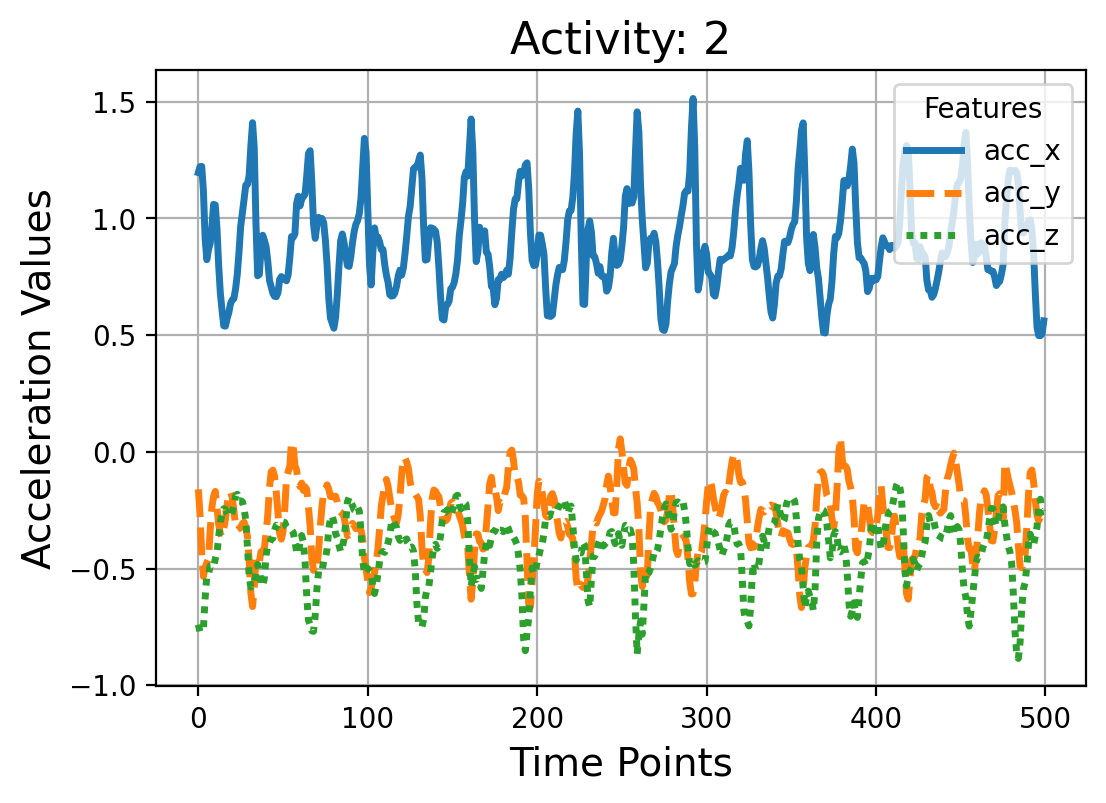

In [76]:
#train's first card belongs to activity 2 
sample_data = pd.DataFrame(X_train[0], columns=['acc_x', 'acc_y', 'acc_z'])
label = y_train[0]
plotting_function(sample_data,label)

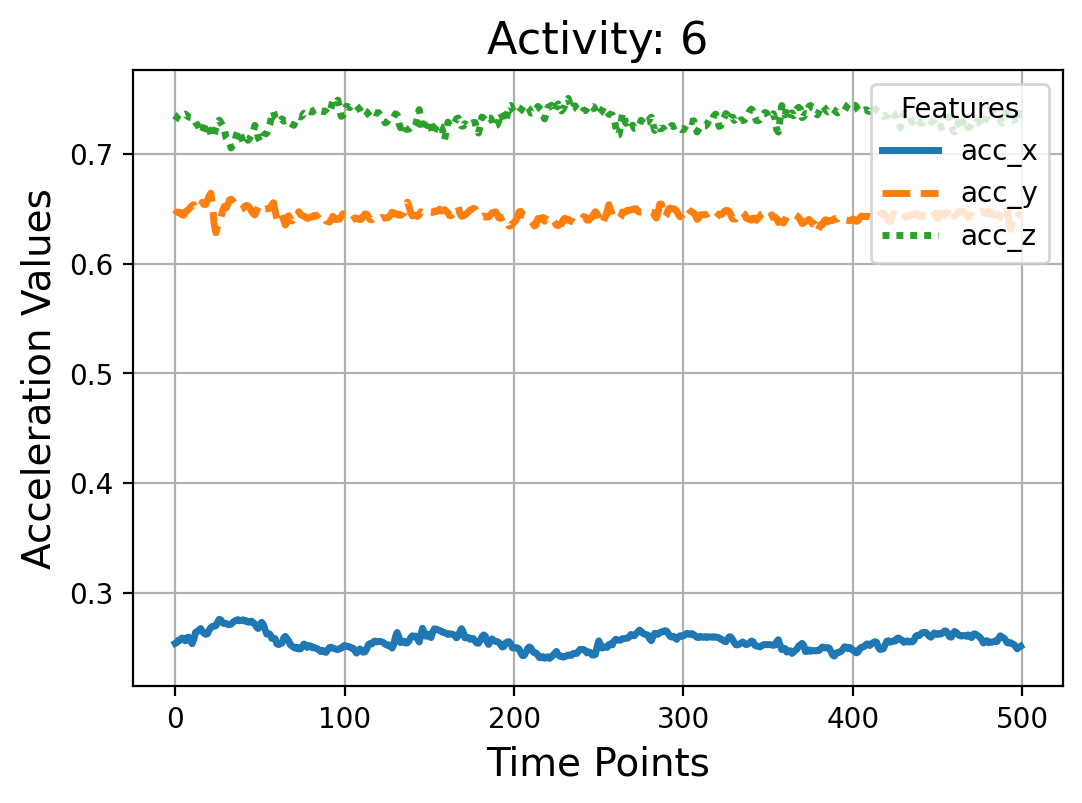

In [77]:
#train's second sample refers to activity 6 
sample_data = pd.DataFrame(X_train[1], columns=['acc_x', 'acc_y', 'acc_z'])
label = y_train[1]
plotting_function(sample_data,label)

## Tasks 

1. figure a way to get the first occurances of all 6 activities
2. edit the function such that the graph prints out the label of the activty as well, not just 1,2,3 

# Question 2

{"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [78]:
# static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs) 
# static activies: 4,5,6 and dynamic activites: 1,2,3

arr = np.array(y_train)  # Replace 'your_data_here' with your actual array

# Extract indices where the value is 1, 2, or 3
dynamic_array = np.where((arr == 1) | (arr == 2) | (arr == 3))[0]

# Extract indices where the value is 4, 5, or 6
static_array = np.where((arr == 4) | (arr == 5) | (arr == 6))[0]

In [79]:
#static and dynamic extraction

static_x_train = X_train[static_array]
static_y_train = y_train[static_array]

dynamic_x_train = X_train[dynamic_array]

In [80]:
#static linear acceleration

static_x_train_linear = np.zeros((static_x_train.shape[0], static_x_train.shape[1]))

for i in range(static_array.shape[0]):
    activity = static_x_train[i,:,:]
    df_activity = pd.DataFrame(activity, columns=["acc_x","acc_y","acc_z"])
    df_activity["acc_linear"] = df_activity["acc_x"]**2 +  df_activity["acc_y"]**2 + df_activity["acc_z"]**2
    static_x_train_linear[i] = df_activity["acc_linear"]

C:\Users\Aryan\AppData\Local\Temp\ipykernel_6532\1653452792.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=sample_data, palette='tab10', linewidth=2.5)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_6532\1653452792.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Features', loc='upper right')


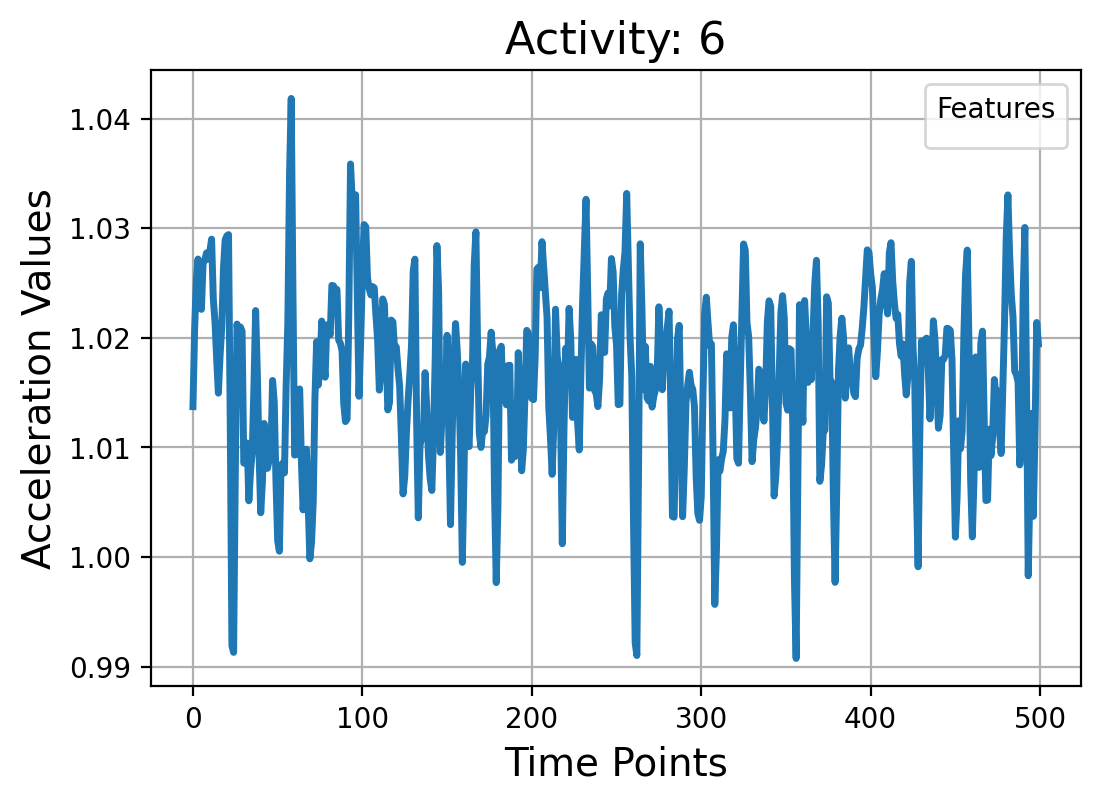

In [81]:
plotting_function(static_x_train_linear[0],static_y_train[0])

C:\Users\Aryan\AppData\Local\Temp\ipykernel_6532\1653452792.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=sample_data, palette='tab10', linewidth=2.5)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_6532\1653452792.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Features', loc='upper right')


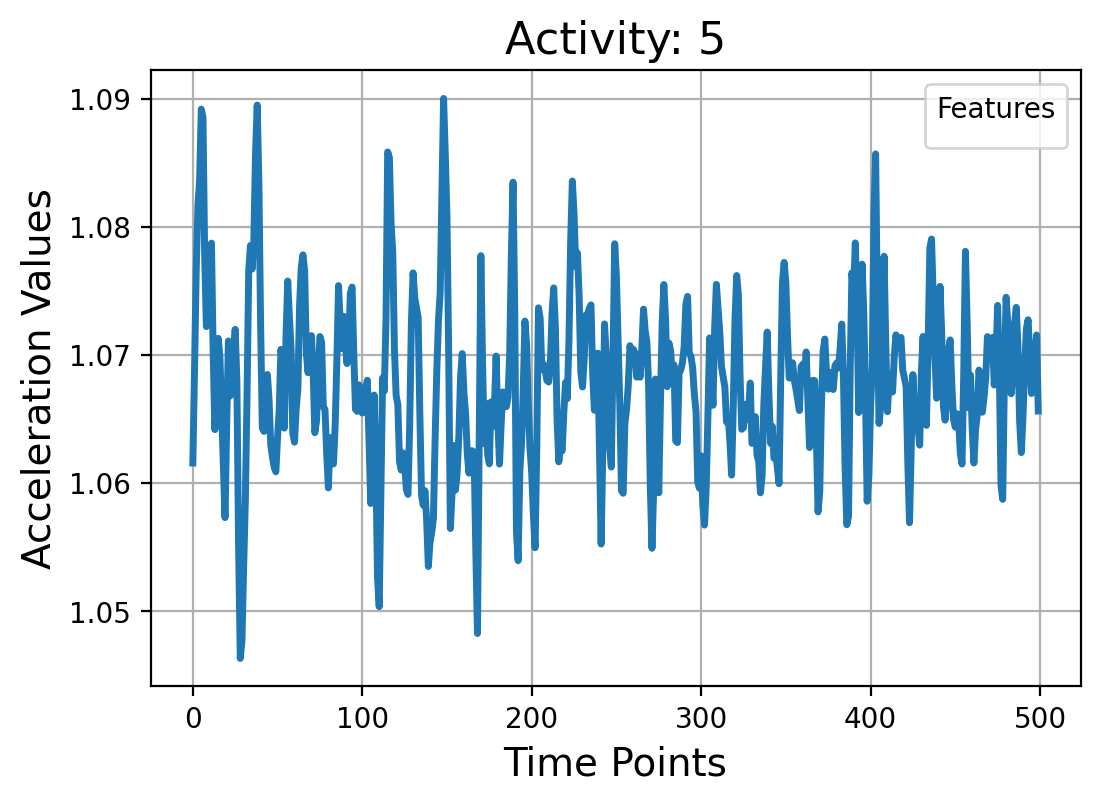

In [82]:
plotting_function(static_x_train_linear[1],static_y_train[1])

In [84]:
mean_linear_across_static = [np.mean(static_x_train_linear[i]) for i in range(static_x_train_linear.shape[0])]
m = np.mean(mean_linear_across_static)
std_ = np.std(static_x_train_linear)
print("static basic stats")
print(f"Mean: {m:.3f}, standard deviation {std_:.3f} ")

static basic stats
Mean: 1.037, standard deviation 0.028 


### tasks 

1. make functions and use them instead of re-writing code 
2. do the same for dynamic 
3. make a new plotting function 
4. use something like pd.Summary on the df etc. so on and do a differential analysis on static and dynamic 

# Question 3